In [1]:
import torch

from torch.utils.data import DataLoader
from torch.nn import BCELoss

from models.autoencoder import Autoencoder
from utils.datasets import load_fashion_mnist
from utils.datasets import load_mnist
from utils.training import train_autoencoder

from utils.plotting import plot_all_reconstructions
from utils.plotting import plot_ae_reconstructions
from utils.plotting import plot_ae_losses

# Load dataset

In [2]:
training_data, testing_data = load_fashion_mnist()

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=64, shuffle=True)

# img_indices = [50563, 24814, 10910, 57495, 57965, 41635]
img_indices = [50563, 24814, 10910]

# Train or load Autoencoder

In [3]:
ae = Autoencoder()
optimizer = torch.optim.Adam(ae.parameters(), lr=1e-3)
recon_loss = BCELoss()

In [11]:
ae_losses, images = train_autoencoder(ae, train_loader, optimizer, recon_loss, 10, img_indices)

checkpoint = {
    "model_state": ae.state_dict(),
    "losses": ae_losses,
    "images": images
}

torch.save(ae.state_dict(), "../checkpoints/autoencoder_param.pth")
torch.save(checkpoint, "../checkpoints/autoencoder_full.pth")

Epoch 1: average loss = 0.3291
Epoch 2: average loss = 0.3002
Epoch 3: average loss = 0.2943
Epoch 4: average loss = 0.2894
Epoch 5: average loss = 0.2863
Epoch 6: average loss = 0.2837
Epoch 7: average loss = 0.2818
Epoch 8: average loss = 0.2802
Epoch 9: average loss = 0.2791
Epoch 10: average loss = 0.2780


In [4]:
ae = Autoencoder()

checkpoint = torch.load("../checkpoints/autoencoder_full.pth", map_location="cpu")
ae.load_state_dict(checkpoint["model_state"])
ae_losses = checkpoint["losses"]
images = checkpoint["images"]

ae.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=2000, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2000, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

# Plot results

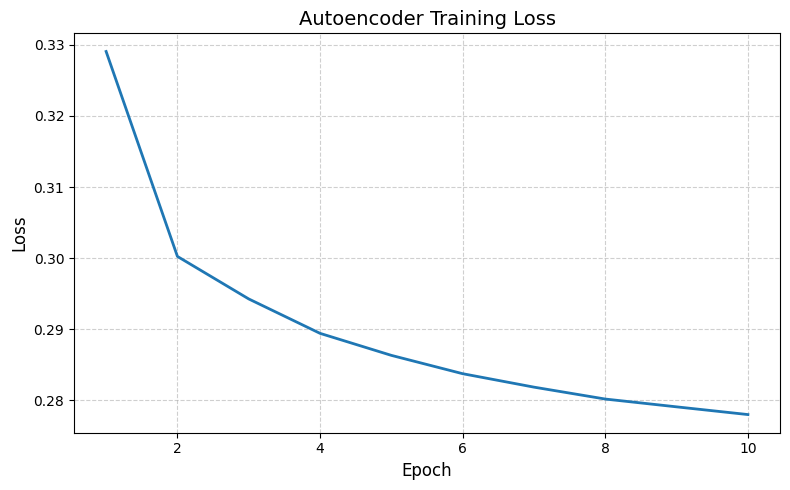

In [5]:
plot_ae_losses(ae_losses)

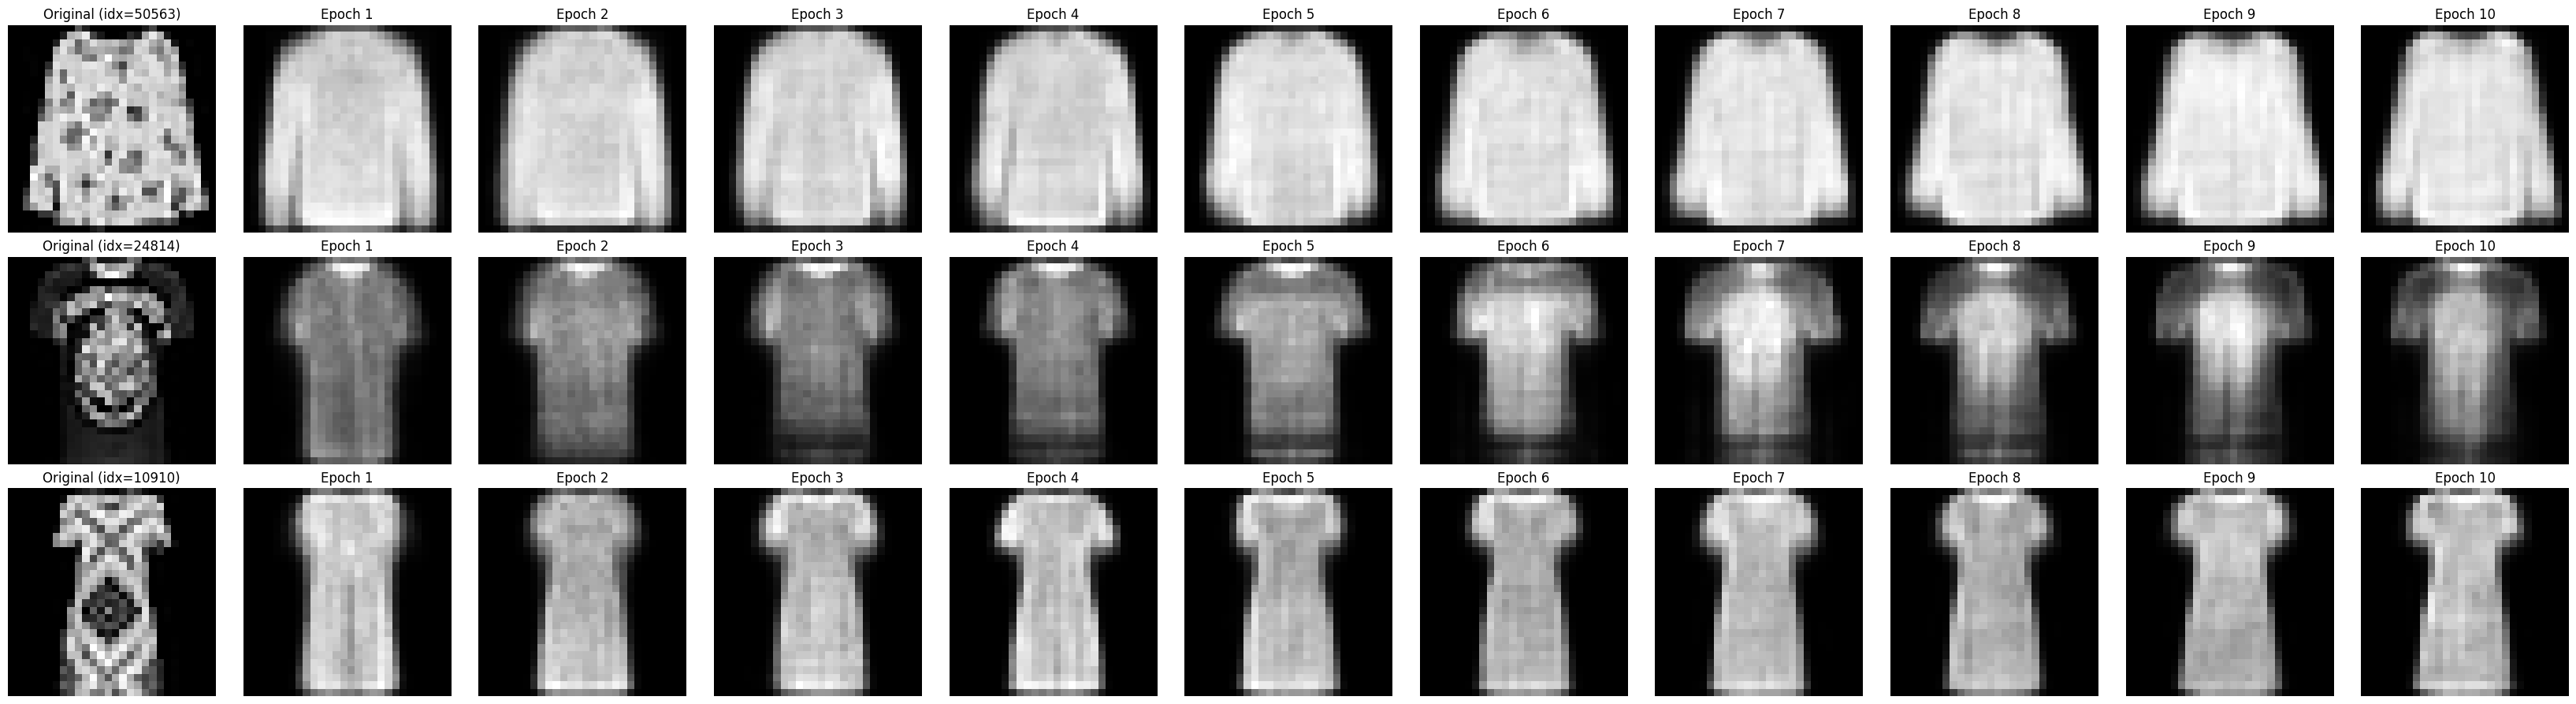

In [6]:
plot_all_reconstructions(images)

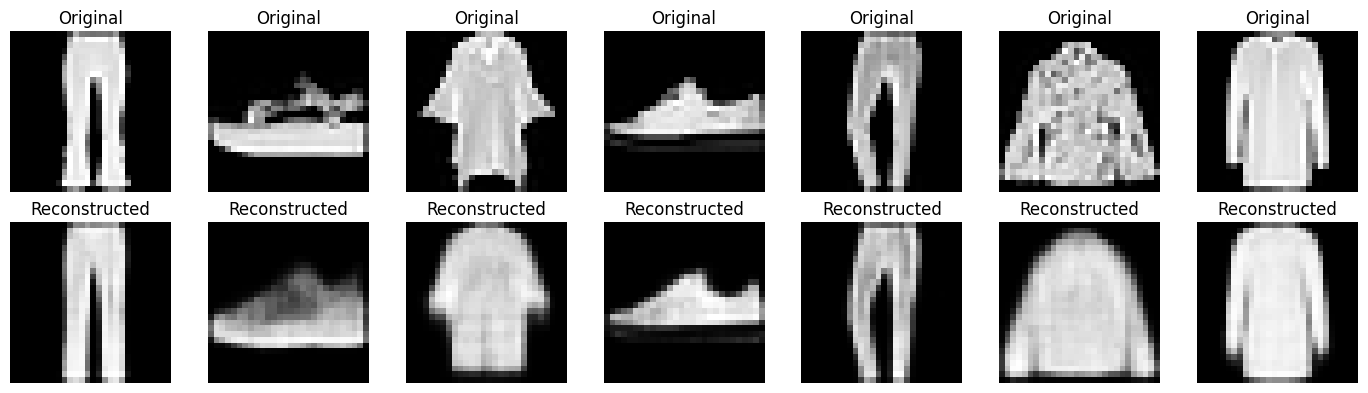

In [10]:
plot_ae_reconstructions(ae, training_data, n=7)